### Importation

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv("actifs.csv")

In [5]:
data = data.sort_values('Date').reset_index(drop=True)
data.head()

,Date,Name,Geographical_zone,Country,Sector,Industry,Value
0,2014-03-12,Enel Americas SA,LATIN AMERICA,CHILE,Utilities,Electric Utilities,159.2500
1,2014-03-12,LIBERTY HOLDINGS LTD,AFRICA,SOUTH AFRICA,Financials,Insurance,121.2072
2,2014-03-12,HANG SENG BANK LTD,ASIA/PACIFIC,HONG KONG,Financials,Banks,120.6000
3,2014-03-12,PTT PCL,ASIA/PACIFIC,THAILAND,Energy,"Oil, Gas & Consumable Fuels",295.0000
4,2014-03-12,ESSEX PROPERTY TRUST INC,NORTH AMERICA,UNITED STATES,Real Estate,Equity Real Estate Investment,165.3600


### Mise en place du pivot

In [6]:
dfpivot = data.pivot_table(index='Date', columns='Name', values='Value')

In [7]:
dfpivot.head()

Name,3I GROUP PLC,3M CO,58.COM INC-ADR,A2A SpA,AAC Technologies Holdings Inc,ABACUS PROPERTY GROUP,ABB LTD-REG,ABBOTT LABORATORIES,ABBVIE INC,ABC-MART INC,...,ZILLOW GROUP INC - C,ZIONS BANCORPORATION,ZOETIS INC,ZTO EXPRESS CAYMAN INC-ADR,Zee Entertainment Enterprises,Zensho Holdings Co Ltd,Zimmer Biomet Holdings Inc,Zurich Insurance Group AG,a2 Milk Co Ltd,kyowa Hakko Kirin Co Ltd
Date,,,,,,,,,,,,,,,,,,,,,
2014-03-12,4.097,NaN,NaN,1.002,33.50,2.33,22.24,NaN,NaN,4385.0,...,NaN,NaN,NaN,NaN,NaN,1057.0,NaN,266.8,NaN,1069.0
2014-03-13,4.044,NaN,NaN,1.000,33.60,2.35,21.87,NaN,NaN,4385.0,...,NaN,NaN,NaN,NaN,NaN,1006.0,NaN,264.8,NaN,1068.0
2014-03-14,4.009,NaN,NaN,0.961,32.15,2.32,21.52,NaN,NaN,4260.0,...,NaN,NaN,NaN,NaN,NaN,999.0,NaN,261.9,NaN,1023.0
2014-03-17,4.035,NaN,NaN,1.029,32.70,2.33,21.86,NaN,NaN,4230.0,...,NaN,NaN,NaN,NaN,NaN,999.0,NaN,262.5,NaN,1013.0
2014-03-18,4.018,NaN,NaN,1.000,32.75,2.30,22.07,NaN,NaN,4295.0,...,NaN,NaN,NaN,NaN,NaN,1003.0,NaN,263.5,NaN,1024.0


### Etude du nombre de NA

In [8]:
dfpivot.isna().sum()

Name
3I GROUP PLC                     199
3M CO                            195
58.COM INC-ADR                   592
A2A SpA                          221
AAC Technologies Holdings Inc    216
                                ... 
Zensho Holdings Co Ltd           217
Zimmer Biomet Holdings Inc       231
Zurich Insurance Group AG        198
a2 Milk Co Ltd                   468
kyowa Hakko Kirin Co Ltd         213
Length: 2529, dtype: int64

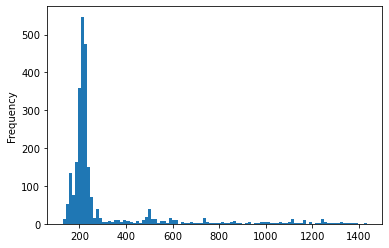

In [9]:
dfpivot.isna().sum().plot.hist(bins=100)

### OBJECTIF : éliminer les colonnes ayant plus d'un certain nombre de NaN consécutifs

Explication : l'idée est de faire une somme cummulative des na/non_naet de voir le nombre de jour où ce compte n'évolue pas.

Ci-dessous, la première ligne signifie que pendant 61 jours, le nombre de na est resté à 137.

In [10]:
dfpivot['3I GROUP PLC'].isna().cumsum().value_counts()

137    61
45     45
64     41
50     35
56     30
       ..
37      1
35      1
33      1
31      1
32      1
Name: 3I GROUP PLC, Length: 200, dtype: int64

Dans ce 2e cas : pendant 12 jours, on a rencontré des que des NaN

In [11]:
dfpivot['3I GROUP PLC'].notna().cumsum().value_counts()

81     12
83      5
105     4
162     4
927     4
       ..
801     1
802     1
803     1
804     1
1       1
Name: 3I GROUP PLC, Length: 1243, dtype: int64

On les localise

In [12]:
dfpivot[dfpivot['3I GROUP PLC'].notna().cumsum()==81]['3I GROUP PLC']

Date
2014-08-01    3.732
2014-08-04      NaN
2014-08-05      NaN
2014-08-06      NaN
2014-08-07      NaN
2014-08-08      NaN
2014-08-11      NaN
2014-08-12      NaN
2014-08-13      NaN
2014-08-14      NaN
2014-08-15      NaN
2014-08-18      NaN
Name: 3I GROUP PLC, dtype: float64

### Application

In [13]:
df_filtered=dfpivot.loc[:,(dfpivot.notna().cumsum().shift().apply(lambda x: x.value_counts()).fillna(0)<15).all()]
df_filtered

Name,3I GROUP PLC,3M CO,A2A SpA,AAC Technologies Holdings Inc,ABACUS PROPERTY GROUP,ABB LTD-REG,ABBOTT LABORATORIES,ABBVIE INC,ABC-MART INC,ABERCROMBIE & FITCH CO-CL A,...,Yamato Holdings Co Ltd,Yuanta Financial Holding Co Lt,ZENKOKU HOSHO CO LTD,ZEON CORP,ZIONS BANCORPORATION,ZOETIS INC,Zensho Holdings Co Ltd,Zimmer Biomet Holdings Inc,Zurich Insurance Group AG,kyowa Hakko Kirin Co Ltd
Date,,,,,,,,,,,,,,,,,,,,,
2014-03-12,4.097,NaN,1.002,33.50,2.33,22.240,NaN,NaN,4385.0,NaN,...,2187.0,15.25,2470.0,957.0,NaN,NaN,1057.0,NaN,266.8,1069.0
2014-03-13,4.044,NaN,1.000,33.60,2.35,21.870,NaN,NaN,4385.0,NaN,...,2150.0,15.30,2408.0,954.0,NaN,NaN,1006.0,NaN,264.8,1068.0
2014-03-14,4.009,NaN,0.961,32.15,2.32,21.520,NaN,NaN,4260.0,NaN,...,2083.0,15.15,2353.0,920.0,NaN,NaN,999.0,NaN,261.9,1023.0
2014-03-17,4.035,NaN,1.029,32.70,2.33,21.860,NaN,NaN,4230.0,NaN,...,2065.0,15.00,2414.0,901.0,NaN,NaN,999.0,NaN,262.5,1013.0
2014-03-18,4.018,NaN,1.000,32.75,2.30,22.070,NaN,NaN,4295.0,NaN,...,2060.0,15.65,2546.0,912.0,NaN,NaN,1003.0,NaN,263.5,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-07,9.576,199.86,1.605,49.40,3.70,19.105,76.80,78.24,6570.0,9.87,...,2949.0,17.60,4165.0,1135.0,100.35,96.27,2669.0,170.37,326.4,2274.0
2019-03-08,9.422,200.89,1.609,47.60,3.69,18.895,76.63,77.58,6490.0,9.42,...,2908.0,17.40,4085.0,1080.0,99.96,96.84,2642.0,169.03,325.8,2255.0
2019-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Après quelques tests, on se rend compte d'irrégularités "régulières", notamment durant les deux premiers mois, puis aux alentours de la 190e valeur. Cela nous conduit à penser que ces actifs disposent d'une caractéristique commune, on pense notamment à la place boursière. 

A travers les exemples ci-dessous, notre hypothèse semble être validée. Nous avons principalement du NYSE et un actif échangé sur NASDAQ. Nous avons confirmé par une recherche en ligne que la cotation n'a pas réellement été suspendue en mars 2014.

In [14]:
dfpivot['3M CO'].notna().cumsum().value_counts().head(10) #NYSE

0      12
191    10
4       9
7       8
1       5
2       5
200     4
161     4
144     3
532     3
Name: 3M CO, dtype: int64

In [15]:
dfpivot['ABBOTT LABORATORIES'].notna().cumsum().value_counts() #NYSE

0      12
190    10
4       9
7       8
163     5
       ..
804     1
805     1
806     1
807     1
622     1
Name: ABBOTT LABORATORIES, Length: 1246, dtype: int64

In [16]:
dfpivot['ABBVIE INC'].notna().cumsum().value_counts() #NYSE

0       12
194     10
4        9
7        8
167      5
        ..
749      1
748      1
747      1
746      1
1250     1
Name: ABBVIE INC, Length: 1251, dtype: int64

In [17]:
dfpivot['ZOETIS INC'].notna().cumsum().value_counts() #NYSE

0      12
190    10
4       9
7       8
210     6
       ..
781     1
780     1
779     1
778     1
610     1
Name: ZOETIS INC, Length: 1221, dtype: int64

In [18]:
dfpivot['ZIONS BANCORPORATION'].notna().cumsum().value_counts() #NASDAQ

0      12
189    10
4       9
7       8
209     6
       ..
774     1
770     1
769     1
767     1
606     1
Name: ZIONS BANCORPORATION, Length: 1214, dtype: int64

**Conclusion :** le jeu de données n'est pas propre. Dès lors nous envisageons deux solutions : soit on élimine ces colonnes entièrement (au risque de ne considérer aucun actif de certaines places boursières comme NYSE), soit on élimine le premier mois et on remplit artificiellement le reste des valeurs manquantes en se servant de la dernière valeur connue.

C'est pour ce deuxième choix que nousa allons opter, sachant que nous avons déjà considérablement filtré en supprimant les actifs contenant plus de 15 NA consécutif à travers le df_filtered.

### Suppression des deux premiers mois

In [19]:
finaldf = df_filtered.iloc[45:,:]

On confirme qu'un traitement additionnel pour la première ligne n'est pas nécessaire - de manière à toujours avoir une valeur "précédente" pour le prochaine traitement.

In [20]:
finaldf.head(1).isna().sum(axis=0)

Name
3I GROUP PLC                     0
3M CO                            0
A2A SpA                          0
AAC Technologies Holdings Inc    0
ABACUS PROPERTY GROUP            0
                                ..
ZOETIS INC                       0
Zensho Holdings Co Ltd           0
Zimmer Biomet Holdings Inc       0
Zurich Insurance Group AG        0
kyowa Hakko Kirin Co Ltd         0
Length: 2013, dtype: int64

### Remplacement des NA

In [21]:
finaldf.fillna(method='ffill', inplace = True)

C:\Users\1s2ad\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [22]:
finaldf.isna().sum(axis=1).sum()

0

In [23]:
finaldf.to_csv("actifs_pivot.csv")

### Benchmark

On reproduit les mêmes étapes

In [73]:
data2 = pd.read_csv("indexes.csv")

data2 = data2.sort_values('Date').reset_index(drop=True)
data2.head()

,Date,Name,Value
0,2014-03-12,CAC40,4306.26
1,2014-03-12,MSCI WORLD,4358.16
2,2014-03-12,S&P500,1868.20
3,2014-03-12,NIKKEI400,10917.03
4,2014-03-12,MSCI THAILAND,475.11


In [74]:
dfpivot2 = data2.pivot_table(index='Date', columns='Name', values='Value').loc['2014-05-14':,:] #on tache de faire commencer le tableau à la même date
dfpivot2.head()

Name,ASX200,BEL20,BOVESPA,CAC40,DAX,DOWJONES,EUROSTOXX50,FOOTSIE100,HANGSENG,IBEX35,ITALY40,MSCI CANADA,MSCI RUSSIA,MSCI SOUTHAFRICA,MSCI THAILAND,MSCI WORLD,NASDAQ100,NIKKEI400,S&P500,SMI
Date,,,,,,,,,,,,,,,,,,,,
2014-05-14,5496.496,3157.51,54412.54,4501.04,9754.39,16613.97,3210.42,6878.49,22582.77,10613.9,21184.60,1850.30,688.02,1226.20,491.13,4458.84,3593.249,10767.97,1888.53,8611.70
2014-05-15,5510.839,3112.00,53855.54,4444.93,9656.05,16446.81,3163.22,6840.89,22730.86,10365.0,20419.62,1839.49,684.51,1213.70,491.12,4426.60,3565.174,10727.94,1870.85,8644.74
2014-05-16,5479.044,3098.15,53975.76,4456.28,9629.10,16491.31,3172.72,6855.81,22712.91,10478.7,20648.59,1829.82,689.22,1208.17,496.99,4430.87,3587.199,10564.03,1877.86,8683.62
2014-05-19,5408.975,3105.37,53353.10,4469.76,9659.39,16511.86,3169.90,6844.55,22704.50,10425.5,20318.46,NaN,706.96,1221.11,498.88,4437.38,3615.617,10491.39,1885.08,8646.02
2014-05-20,5420.352,3105.36,52366.19,4452.35,9639.08,16374.31,3163.93,6802.00,22834.68,10453.8,20379.85,1832.50,709.80,1222.28,490.24,4417.15,3600.308,10522.16,1872.83,8635.61


In [75]:
dfpivot2.isna().sum()

Name
ASX200              36
BEL20               23
BOVESPA             66
CAC40               23
DAX                 38
DOWJONES            45
EUROSTOXX50         20
FOOTSIE100          37
HANGSENG            70
IBEX35              23
ITALY40             33
MSCI CANADA         49
MSCI RUSSIA          0
MSCI SOUTHAFRICA    49
MSCI THAILAND       76
MSCI WORLD           0
NASDAQ100           45
NIKKEI400           75
S&P500              45
SMI                 47
dtype: int64

In [76]:
dfpivot2.fillna(method='ffill', inplace = True) #forwards fill des valeurs NA
dfpivot2.isna().sum(axis=1).sum() #vérification

0

In [77]:
dfpivot2.to_csv("index_pivot.csv") #export

In [78]:
df_corrige = df_filtered.loc['2014-05-14':,:].join(dfpivot2, how='left')#.fillna(method='ffill', inplace=True)

In [79]:
df_corrige.fillna(method='ffill', inplace=True)

In [85]:
df_corrige[dfpivot2.columns.values].to_csv("index_pivot.csv")

In [81]:
df_corrige.count()

Name
3I GROUP PLC                     1397
3M CO                            1397
A2A SpA                          1397
AAC Technologies Holdings Inc    1397
ABACUS PROPERTY GROUP            1397
                                 ... 
MSCI WORLD                       1397
NASDAQ100                        1397
NIKKEI400                        1397
S&P500                           1397
SMI                              1397
Length: 2033, dtype: int64

In [84]:
pd.read_csv("index_pivot.csv")

FileNotFoundError: [Errno 2] File index_pivot.csv does not exist: 'index_pivot.csv'